### Using CNN on MNIST data

In [18]:
# Importing dependencies 
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

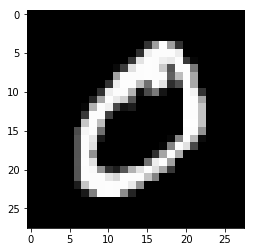

In [20]:
## Viewing first data
plt.imshow(train_images[1],cmap='gray')

### Data Pre-processing

In [26]:
X_train = train_images
Y_train = train_labels
x_test = test_images
y_test = test_labels

In [27]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32')/255
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32')/255
Y_train = to_categorical(Y_train)
y_test = to_categorical(y_test)

### Instantiating CNN for mnist data classification

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (5,5), input_shape=(28,28,1), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size = (5,5), padding = 'same', activation ='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation ='softmax'))

### Configuring model for training

In [31]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 106s 2ms/step - loss: 0.1175 - accuracy: 0.9642
Epoch 2/5
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0364 - accuracy: 0.9891
Epoch 3/5
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0253 - accuracy: 0.9926
Epoch 4/5
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0187 - accuracy: 0.9945
Epoch 5/5
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0150 - accuracy: 0.9958


In [32]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

### Model evaluation and accuracy on test-data

In [33]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 573us/step


In [34]:
score

[0.03810933476223609, 0.9918000102043152]

In [38]:
predictions = model.predict_classes(x_test[:20])
Actual_label = (test_labels[:20])

In [42]:
import pandas as pd
validation_df = pd.DataFrame({
    'Prediction': predictions,
    'Actual Result': Actual_label
})
validation_df

,Prediction,Actual Result
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9
